Data Evaluation

- Ziel ist es, die erstellten Modelle auf Performance und Overfitting zu evaluieren

### Random Forest

#### Initialisierung

In [1]:
import pandas as pd;
from matplotlib import pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from confusion_matrix_utils import cross_val_predict, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

dec_tree = tree.DecisionTreeClassifier()
ran_for = RandomForestClassifier(n_estimators = 70)
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
cleaned_data = pd.read_csv('cleaned_data.csv')
crime_cats_with_occs = cleaned_data[['CRIME_CAT','Crm.Cd']].groupby('CRIME_CAT')['Crm.Cd'].count().to_dict()
sorted_labels = list(map(lambda x: x[0], sorted(list(crime_cats_with_occs.items()), key=lambda x: x[1], reverse=True)))

In [2]:
features = ['LAT','LONG', 'RD']
target = 'CRIME_CAT'
selection = features + [target]

predict_data_encoded = cleaned_data[selection].copy()
#predict_data_encoded = pd.get_dummies(predict_data, columns=['AREA.NAME'])

X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded.drop(target, axis=1), predict_data_encoded[target], test_size=0.2, random_state=42)
ran_for.fit(X_train, y_train)

print(f'Model Accuracy: {ran_for.score(X_test,y_test)}')
max_tree_depths = [estimator.tree_.max_depth for estimator in ran_for.estimators_]
max_depth = max(max_tree_depths)
print("Maximale Tiefe aller Entscheidungsbäume im Random Forest:", max_depth)

print("Anzahl der Entscheidungsbäume im Random Forest:", ran_for.n_estimators)

KeyboardInterrupt: 

#### Fitting Graph Random Forest 

In [28]:
acc = []
for i in range(1, 40,1):
    #dec_tree = tree.DecisionTreeClassifier(max_depth=i)
    ran_for = RandomForestClassifier(max_depth=i, n_estimators = 64)
    score = cross_validate(ran_for, predict_data_encoded[features], predict_data_encoded[target], cv=5, return_train_score=True)
    print(f"Max Depth: {i}, Test Accuracy: {round(score['test_score'].mean(), ndigits=4)} ({round(score['test_score'].std(), ndigits=4)}), Train Accuracy: {round(score['train_score'].mean(), ndigits=4)} ({round(score['train_score'].std(), ndigits=4)})")
    acc.append((score['test_score'].mean(),score['test_score'].std(),score['train_score'].mean(),score['train_score'].std()))
#print(acc)

Max Depth: 1, Test Accuracy: 0.1823 (0.0053), Train Accuracy: 0.1834 (0.0062)
Max Depth: 2, Test Accuracy: 0.1914 (0.0051), Train Accuracy: 0.1916 (0.0024)
Max Depth: 3, Test Accuracy: 0.1975 (0.0047), Train Accuracy: 0.1987 (0.0026)
Max Depth: 4, Test Accuracy: 0.2037 (0.0033), Train Accuracy: 0.2059 (0.0013)
Max Depth: 5, Test Accuracy: 0.209 (0.003), Train Accuracy: 0.2108 (0.0014)
Max Depth: 6, Test Accuracy: 0.2123 (0.0027), Train Accuracy: 0.2156 (0.0013)
Max Depth: 7, Test Accuracy: 0.2174 (0.0022), Train Accuracy: 0.2213 (0.0012)
Max Depth: 8, Test Accuracy: 0.2214 (0.0027), Train Accuracy: 0.2261 (0.0009)
Max Depth: 9, Test Accuracy: 0.2276 (0.0031), Train Accuracy: 0.2338 (0.0007)
Max Depth: 10, Test Accuracy: 0.2331 (0.0034), Train Accuracy: 0.2418 (0.0006)
Max Depth: 11, Test Accuracy: 0.2406 (0.0043), Train Accuracy: 0.2534 (0.0007)
Max Depth: 12, Test Accuracy: 0.2479 (0.0062), Train Accuracy: 0.2653 (0.0006)
Max Depth: 13, Test Accuracy: 0.2551 (0.0068), Train Accuracy: 

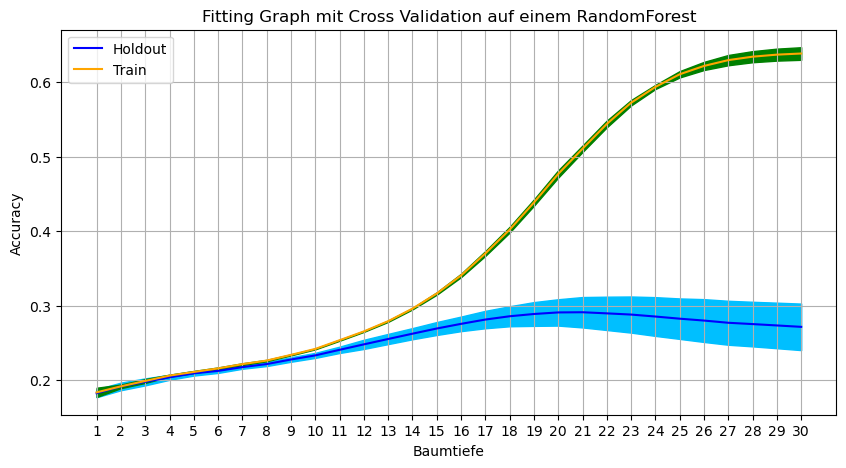

In [31]:
from matplotlib import pyplot as plt
import numpy as np

test_acc_list = list(map(lambda x: x[0], acc))[:30]
test_std_list = list(map(lambda x: x[1], acc))[:30]
train_acc_list = list(map(lambda x: x[2], acc))[:30]
train_std_list = list(map(lambda x: x[3], acc))[:30]

lower_bound_test = np.array(test_acc_list) - np.array(test_std_list)
upper_bound_test = np.array(test_acc_list) + np.array(test_std_list)
lower_bound_train = np.array(train_acc_list) - np.array(train_std_list)
upper_bound_train = np.array(train_acc_list) + np.array(train_std_list)

tree_depth = list(range(1,31, 1))
N = len(tree_depth)
tree_quantity = np.arange(N)
plt.subplots(figsize=(10, 5))

plt.plot(tree_quantity, test_acc_list, label="Holdout", 
color="blue")
plt.fill_between(tree_quantity, lower_bound_test, upper_bound_test, color="deepskyblue")


plt.plot(tree_quantity, train_acc_list, label="Train", 
color="orange")
plt.fill_between(tree_quantity, lower_bound_train, upper_bound_train, color="green")


plt.xticks(tree_quantity, tree_depth)
plt.grid(True)
plt.xlabel("Baumtiefe")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Fitting Graph mit Cross Validation auf einem RandomForest', fontsize=12)
plt.show()

### Lernkurve Random Forest

In [ ]:
features = ['RD','LAT','LONG']
target = 'CRIME_CAT'
selection = features + [target]

predict_data_encoded = cleaned_data[selection].copy()
#predict_data_encoded = pd.get_dummies(predict_data, columns=['AREA.NAME'])

#X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded.drop(target, axis=1), predict_data_encoded[target], test_size=0.2, random_state=42)
#rand_for = RandomForestClassifier(max_depth= 30, n_estimators= 60)
#score = cross_validate(rand_for, predict_data_encoded[features], predict_data_encoded[target], cv=5, return_train_score=True)
#rand_for.fit(X_train,y_train)

#print(f'Model Accuracy: {rand_for.score(X_test,y_test)}')
#print(rand_for.get_depth()) 

test_sizes = list(np.flip(np.linspace(0.1,1,9,endpoint=False)))
learning_curve = []
for test_size in test_sizes:
    model = RandomForestClassifier(max_depth= 30, n_estimators= 60)
    X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded[features], predict_data_encoded[target], test_size=test_size, random_state=42)
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    learning_curve.append(score)
    print(f'Score {test_size}: {score}')
print(learning_curve)

### Confusion Matrix Random Forest

In [ ]:
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# Build a Gaussian Classifier
nb_class = RandomForestClassifier(max_depth=30 , n_estimators=60)

features = ['LONG','LAT','RD']
target = 'CRIME_CAT'
selection = features + [target]
predict_data_encoded = cleaned_data[selection].copy()

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
actual_classes, predict_classes, _ = cross_val_predict(DecisionTreeClassifier(max_depth = 25), kfold, np.array(predict_data_encoded[features]), np.array(predict_data_encoded[target]))
plot_confusion_matrix(actual_classes, predict_classes, sorted_labels, mode='relative')

### Lernkurve Decision Tree

In [ ]:
features = ['RD','LAT','LONG']
target = 'CRIME_CAT'
selection = features + [target]

predict_data_encoded = cleaned_data[selection].copy()
#predict_data_encoded = pd.get_dummies(predict_data, columns=['AREA.NAME'])

X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded.drop(target, axis=1), predict_data_encoded[target], test_size=0.2, random_state=42)
dec_tree = tree.DecisionTreeClassifier(max_depth= 25)
score = cross_validate(dec_tree, predict_data_encoded[features], predict_data_encoded[target], cv=5, return_train_score=True)
dec_tree.fit(X_train,y_train)

print(f'Model Accuracy: {dec_tree.score(X_test,y_test)}')
print(dec_tree.get_depth())

test_sizes = list(np.flip(np.linspace(0.1,1,9,endpoint=False)))
learning_curve = []
for test_size in test_sizes:
    model = dec_tree
    X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded[features], predict_data_encoded[target], test_size=test_size, random_state=42)
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    learning_curve.append(score)
    print(f'Score {test_size}: {score}')
print(learning_curve)